In [ ]:
Probabilistic clustering with Gaussian Mixture Models

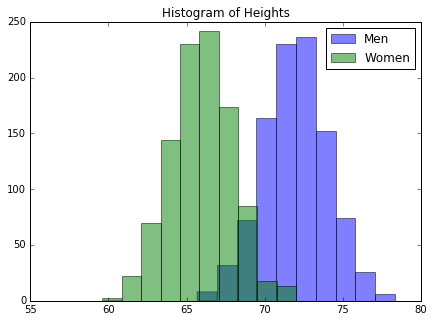

In [1]:
import numpy as np
 
N = 1000
in_m = 72
in_w = 66
s_m = 2
s_w = s_m
m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)
from matplotlib import pyplot as plt
 
%matplotlib inline
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Histogram of Heights")
ax.hist(m, alpha=.5, label="Men");
ax.hist(w, alpha=.5, label="Women");
ax.legend()

In [2]:
random_sample = np.random.choice([True, False], size=m.size)
m_test = m[random_sample]
m_train = m[~random_sample]
w_test = w[random_sample]
w_train = w[~random_sample]

In [3]:
from scipy import stats
m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())
m_pdf.pdf(m[0])

0.1620595168883931

In [4]:
w_pdf.pdf(m[0])

0.012675120809233463

In [5]:
guesses_m = np.ones_like(m_test)
guesses_m[m_pdf.pdf(m_test) < w_pdf.pdf(m_test)] = 0

In [6]:
guesses_m.mean()

0.93207547169811322

In [7]:
guesses_w = np.ones_like(w_test)
guesses_w[m_pdf.pdf(w_test) > w_pdf.pdf(w_test)] = 0
guesses_w.mean()

0.94339622641509435

In [8]:
s_m = 1
s_w = 4
m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)

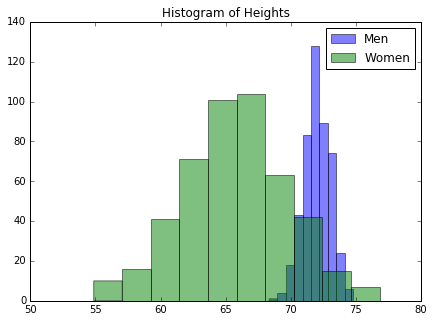

In [9]:
m_test = m[random_sample]
m_train = m[~random_sample]
w_test = w[random_sample]
w_train = w[~random_sample]
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Histogram of Heights")
ax.hist(m_train, alpha=.5, label="Men");
ax.hist(w_train, alpha=.5, label="Women");
ax.legend()

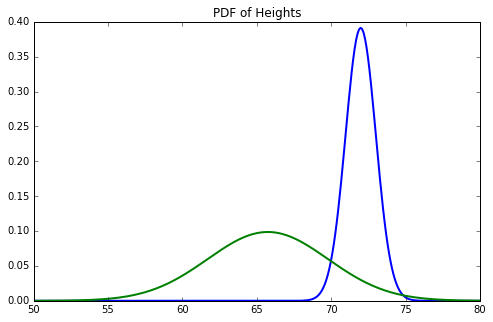

In [10]:
m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())
 
x = np.linspace(50,80,300)
plt.figure(figsize=(8,5))
plt.title('PDF of Heights')
plt.plot(x, m_pdf.pdf(x), 'k', linewidth=2, color='blue', label='Men')
plt.plot(x, w_pdf.pdf(x), 'k', linewidth=2, color='green',label='Women')

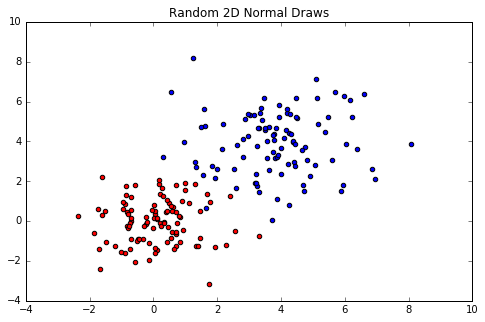

In [11]:
class_A = np.random.normal(0, 1, size=(100, 2))
class_B = np.random.normal(4, 1.5, size=(100, 2))
f, ax = plt.subplots(figsize=(8, 5))
plt.title('Random 2D Normal Draws')
ax.scatter(class_A[:,0], class_A[:,1], label='A', c='r')
ax.scatter(class_B[:,0], class_B[:,1], label='B')

In [12]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
X = np.row_stack((class_A, class_B))
y = np.hstack((np.ones(100), np.zeros(100)))

train = np.random.choice([True, False], 200)
gmm.fit(X[train])


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [13]:
gmm.predict(X[train])[:5]

array([1, 1, 1, 1, 1], dtype=int64)